In [4]:
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("rishgeeky/indian-pharmaceutical-products")

print("Path to dataset files:", path)

  Using cached kagglehub-0.3.12-py3-none-any.whl.metadata (38 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached kagglehub-0.3.12-py3-none-any.whl (67 kB)
Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl (156 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
d:\MediPrcie AI- Data Science Project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 10.5M/10.5M [00:04<00:00, 2.48MB/s]

Extracting files...


Path to dataset files: C:\Users\maitr\.cache\kagglehub\datasets\rishgeeky\indian-pharmaceutical-products\versions\1


In [ ]:
import os
files=os.listdir(path)
print(files)

['indian_pharmaceutical_products_clean.csv']


In [6]:
import pandas as pd
df=pd.read_csv(f"{path}/indian_pharmaceutical_products_clean.csv")
print(df.head())

   product_id                brand_name                          manufacturer  \
0           1  Augmentin 625 Duo Tablet  Glaxo SmithKline Pharmaceuticals Ltd   
1           2       Azithral 500 Tablet           Alembic Pharmaceuticals Ltd   
2           3          Ascoril LS Syrup          Glenmark Pharmaceuticals Ltd   
3           4      Allegra 120mg Tablet                      Sanofi India Ltd   
4           5            Avil 25 Tablet                      Sanofi India Ltd   

   price_inr  is_discontinued dosage_form  pack_size pack_unit  \
0     223.42            False      tablet       10.0     strip   
1     132.36            False      tablet        5.0     strip   
2     118.00            False       syrup      100.0    bottle   
3     218.81            False      tablet       10.0     strip   
4      10.96            False      tablet       15.0     strip   

   num_active_ingredients primary_ingredient primary_strength  \
0                       2        Amoxycillin       

In [7]:
print(df.shape)
print("\nColumn name:", df.columns.tolist())
print(df.info())

(253973, 15)

Column name: ['product_id', 'brand_name', 'manufacturer', 'price_inr', 'is_discontinued', 'dosage_form', 'pack_size', 'pack_unit', 'num_active_ingredients', 'primary_ingredient', 'primary_strength', 'active_ingredients', 'therapeutic_class', 'packaging_raw', 'manufacturer_raw']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_id              253973 non-null  int64  
 1   brand_name              253973 non-null  object 
 2   manufacturer            253973 non-null  object 
 3   price_inr               253973 non-null  float64
 4   is_discontinued         253973 non-null  bool   
 5   dosage_form             253973 non-null  object 
 6   pack_size               231643 non-null  float64
 7   pack_unit               231643 non-null  object 
 8   num_active_ingredients  253973 non-null  int64  
 9

In [8]:
df.isnull().sum()

product_id                    0
brand_name                    0
manufacturer                  0
price_inr                     0
is_discontinued               0
dosage_form                   0
pack_size                 22330
pack_unit                 22330
num_active_ingredients        0
primary_ingredient            0
primary_strength          25198
active_ingredients            0
therapeutic_class             0
packaging_raw                 0
manufacturer_raw              0
dtype: int64

In [9]:
df.describe()

,product_id,price_inr,pack_size,num_active_ingredients
count,253973.000000,253973.000000,231643.000000,253973.000000
mean,126987.000000,270.530844,18.988871,1.441893
std,73315.834296,3029.584134,36.717320,0.496795
min,1.000000,0.000000,1.000000,1.000000
25%,63494.000000,48.000000,10.000000,1.000000
50%,126987.000000,79.000000,10.000000,1.000000
75%,190480.000000,140.000000,10.000000,2.000000
max,253973.000000,436000.000000,5000.000000,5.000000


In [10]:
print("\n Dosage Form:",df['dosage_form'].unique)


 Dosage Form: <bound method Series.unique of 0             tablet
1             tablet
2              syrup
3             tablet
4             tablet
             ...    
253968    suspension
253969        tablet
253970        tablet
253971     injection
253972        powder
Name: dosage_form, Length: 253973, dtype: object>


In [11]:
print("\n Pack units:",df['pack_unit'].unique)


 Pack units: <bound method Series.unique of 0          strip
1          strip
2         bottle
3          strip
4          strip
           ...  
253968    bottle
253969     strip
253970     strip
253971       NaN
253972        gm
Name: pack_unit, Length: 253973, dtype: object>


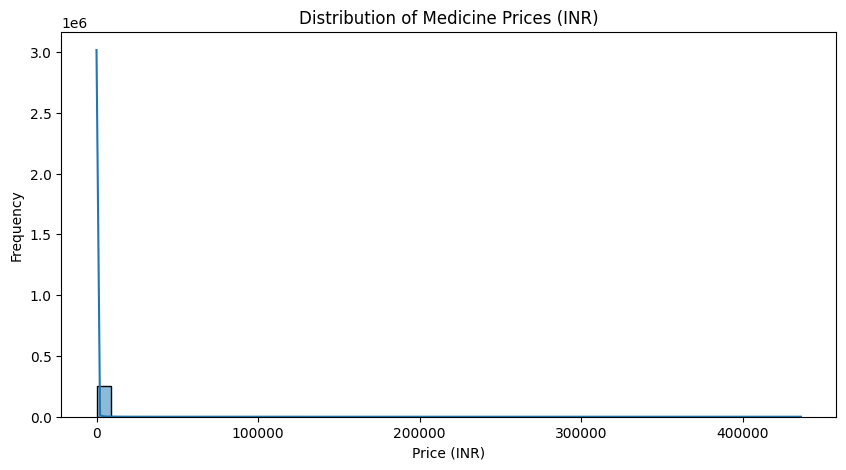

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['price_inr'], bins=50, kde=True)
plt.title("Distribution of Medicine Prices (INR)")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.show()

In [13]:
df_clean = df.dropna(subset=['pack_size', 'pack_unit', 'primary_strength'])
print("New shape after dropping:", df_clean.shape)

New shape after dropping: (208654, 15)


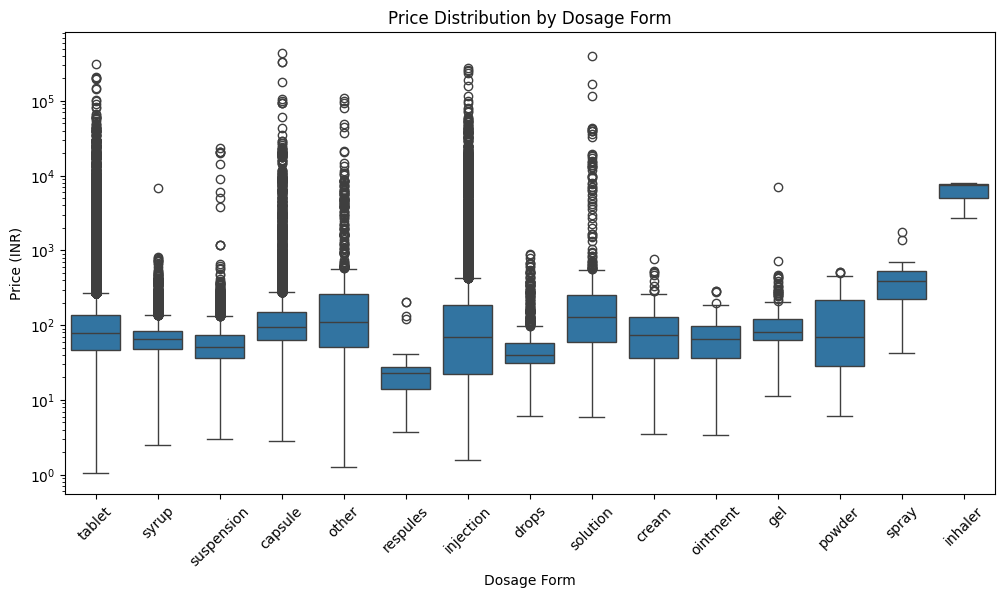

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='dosage_form', y='price_inr')
plt.xticks(rotation=45)
plt.title("Price Distribution by Dosage Form")
plt.xlabel("Dosage Form")
plt.ylabel("Price (INR)")
plt.yscale('log')  # prices vary a lot!
plt.show()


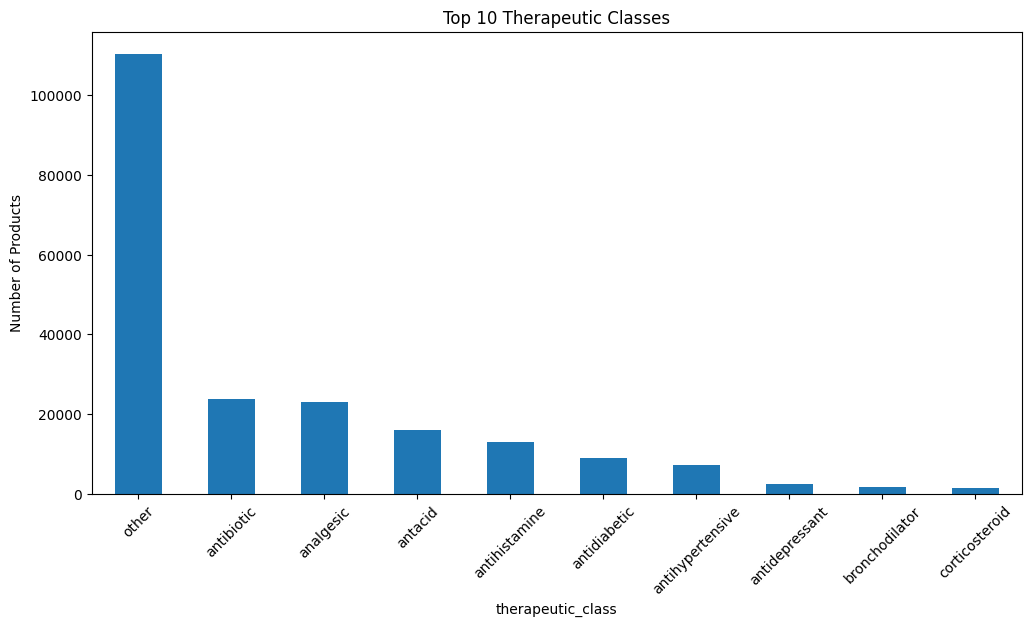

In [15]:
plt.figure(figsize=(12, 6))
df_clean['therapeutic_class'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Therapeutic Classes")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()


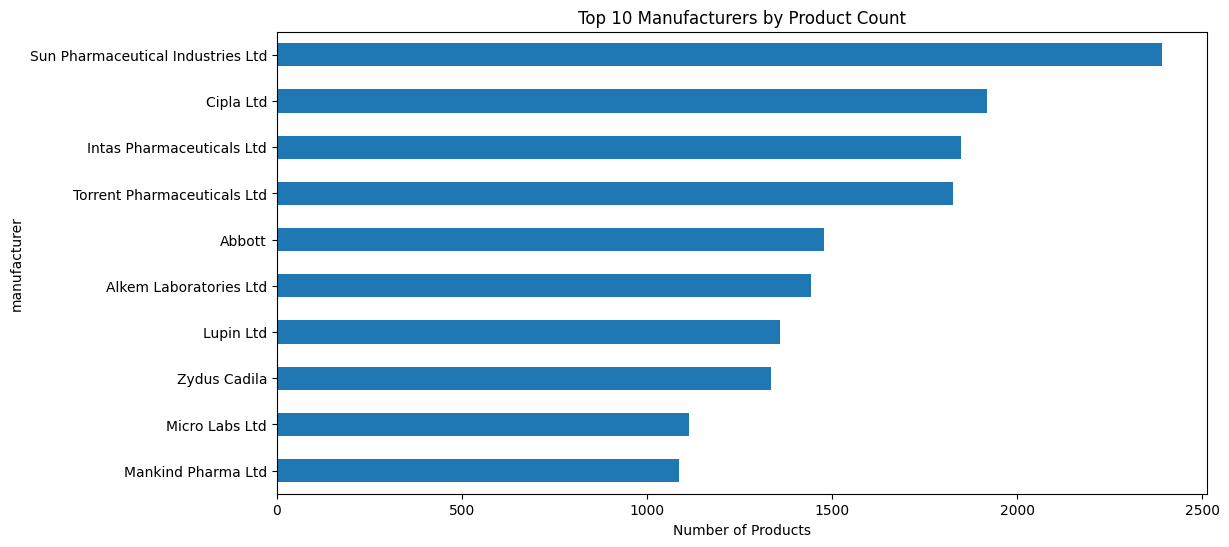

In [16]:
plt.figure(figsize=(12, 6))
df_clean['manufacturer'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Manufacturers by Product Count")
plt.xlabel("Number of Products")
plt.gca().invert_yaxis()
plt.show()

In [17]:
import re

def extract_strength(val):
    if isinstance(val, str):
        match = re.search(r"(\d+\.?\d*)", val)
        return float(match.group(1)) if match else None
    return None

df_clean['primary_strength_mg'] = df_clean['primary_strength'].apply(extract_strength)

C:\Users\maitr\AppData\Local\Temp\ipykernel_5316\1991736825.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['primary_strength_mg'] = df_clean['primary_strength'].apply(extract_strength)


In [18]:
df_model = pd.get_dummies(df_clean, columns=['dosage_form', 'pack_unit', 'therapeutic_class'], drop_first=True)

In [19]:
# Final columns to keep
selected_columns = [
    'num_active_ingredients',
    'pack_size',
    'primary_strength_mg'
] + [col for col in df_model.columns if col.startswith('dosage_form_') or col.startswith('pack_unit_') or col.startswith('therapeutic_class_')]

X = df_model[selected_columns]
y = df_model['price_inr']

print("Final feature shape:", X.shape)

Final feature shape: (208654, 32)


In [21]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (166923, 32)
Test shape: (41731, 32)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
mse = mean_squared_error(y_test, y_pred_lr)
print("RMSE:", np.sqrt(mse))
print("R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression Results:
MAE: 252.54045444327153
RMSE: 2952.0590914852564
R² Score: 0.03850245970231281


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("RMSE:", np.sqrt(mse_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

Random Forest Results:
MAE: 163.27387032010648
RMSE: 2771.2255960730067
R² Score: 0.1526909446242508


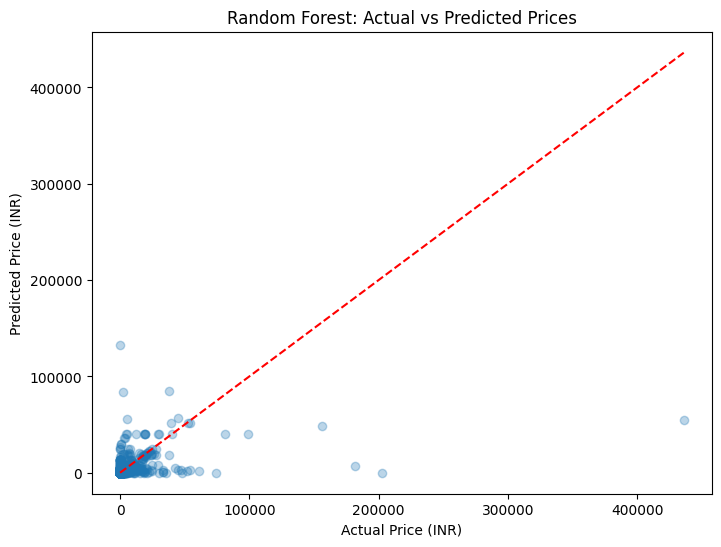

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual Price (INR)")
plt.ylabel("Predicted Price (INR)")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--')
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Ensure X_train, X_test, y_train, and y_test are defined by running the preceding cells

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)

best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("R²:", r2_score(y_test, y_pred_best))

Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 162.58640080121015
R²: 0.1677780811839915


In [26]:
import joblib

# Save model
joblib.dump(rf, 'rf_model.pkl')

# Save feature columns
joblib.dump(X.columns.tolist(), 'model_features.pkl')



['model_features.pkl']